In [30]:
# importation des packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn import datasets

In [12]:
# importation des données

df = pd.read_csv('Mall_Customers.csv')

In [13]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [14]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
# Suppression des colonne inutile
df.drop('CustomerID', axis = 1, inplace = True)
df.drop('Gender', axis = 1, inplace = True)
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [9]:
# description statistique pour notre dataset
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [20]:
# Strandarisation des données

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [27]:
# Application de Kmeans
cluster_range = [1,2,3,4,5,6,7,8,9,10]
inertie = []

for i in cluster_range:
    kmeans=KMeans(init='k-means++',n_clusters=i).fit(df_scaled)
    inertie.append(kmeans.inertia_)


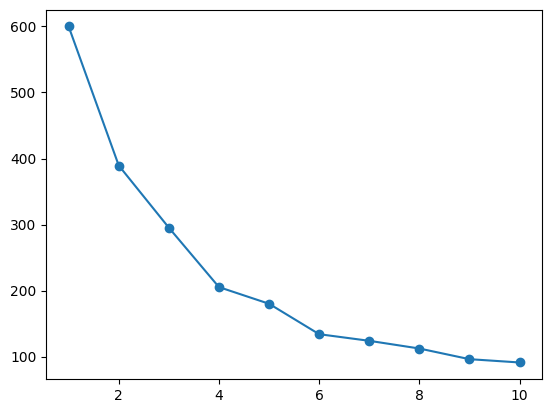

In [31]:
# Création du visuel pour voir l'elbow
plt.Figure()
plt.plot(cluster_range,inertie,marker='o')
plt.show()

A partir de ce visuel, on peut prendre 4 centroides pour segmenter nos données

In [32]:
# Segmentations du données à partir de 5 cluster
Kmeans = KMeans(n_clusters = 4).fit(df_scaled)
labels = Kmeans.labels_

In [43]:
# Ajout de l'etiquette pour les données
new_data = pd.DataFrame(data= df_scaled, columns = ['Age', 'Annual Income ','Spending Score (1-100)'])
new_data['labels_kmeans']=labels

new_data

,Age,Annual Income,Spending Score (1-100),labels_kmeans
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,2
197,-0.491602,2.497807,0.923953,0
198,-0.491602,2.917671,-1.250054,2


In [56]:
# Affichage de chaque label avec les données d'origine
data = pd.read_csv('Mall_Customers.csv')
data['cluster']= labels

data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2
